# Calculate the latent heat flux

#### 1. Import libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt

#### 2. We define the variables

rho = air density

Ce = transfer coefficient for latent heat àset to 1.2 *Ch (Ch=transfer coefficient for sensible heat)

u = wind speed in m/s

qs = 98% of saturated specific humidity at the sea surface temperature (98% accounts for salt effect)

qa = measured specific humidity

Ts = sea temperature (Celsius)

In [66]:
rho = 1.2041 #(kg/m3)
Ch = 1e-3 #W/(m2 K)
Ce = Ch * 1.2
u = 6 #(m/s)
qs = 0.007 #(kg/kg)
qa = 0.009 #(g/kg)
Ts = 291 #(celsius)

#### 3. We first calculate the "latent heat of evaporation" (L) and the "rate of evaporation" (Fe)

In [67]:
L = (2494 - 2.2 * (Ts-273)) * 1000
Fe = rho * Ce * u * (0.98*qs - qa)

Now we can estimate the latent heat flux

In [68]:
Qe=Fe*L
print('Sensible heat flux =',Qe, '(W/m2)')

Sensible heat flux = -45.53592556031998 (W/m2)


#### 4. How does the daily change in SST affect the latent heat flux?

First we create an idealized daily cycle of SST

In [69]:
#create an array with the radians for the sin function
rad = np.linspace(0,np.pi*2,24)

#The sin function simulates the daily variability of SST
Ts_serie = 3*np.sin(rad)+287 #3 degrees of amplitude and centered at 287 

Text(0.5, 0, 'Time (h)')

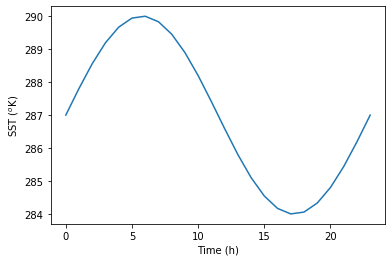

In [70]:
#Plot the daily SST
plt.plot(Ts_serie) 
plt.ylabel('SST ($^o$K)') #Define Y axis label 
plt.xlabel('Time (h)') #Define X axis label 

Now we can apply the formula to the new array of SST we just created
We first need to recalculate the "latent heat of evaporation" (L)

In [71]:
#Recalculate L for the daily SST cycle
L_serie = (2494 - 2.2 * (Ts_serie-273)) * 1000

#Apply formula
Qe_serie_1 = Fe * L_serie

Text(0, 0.5, 'Qe (W m$^{-2}$)')

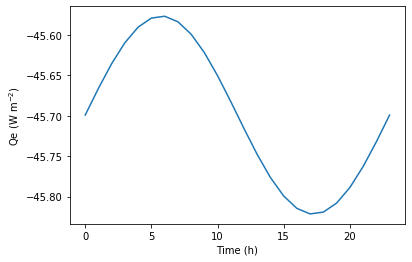

In [72]:
#plot results
plt.plot(Qe_serie_1)
plt.xlabel('Time (h)')
plt.ylabel('Qe (W m$^{-2}$)')

#### 5. What if the wind picks up during the day? 

We need to create an array containing the values of wind speed (u) and recalculate the "rate of evaporation" (Fe)

In [73]:
#Create the array containing the values of u
u_serie = np.linspace(6,7,24)

#recalculate Fe for the varying wind
Fe_serie = rho * Ce * u_serie * (0.98*qs - qa)

#Apply formula combining the SST day cycle and the increasing wind speed
Qe_serie_2 = Fe_serie * L_serie

Text(0, 0.5, 'Qe (W m$^{-2}$)')

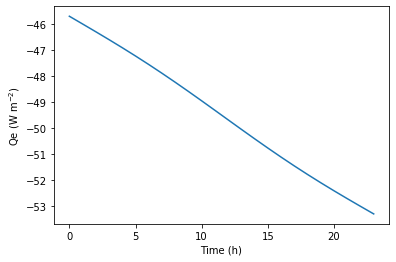

In [74]:
#plot results
plt.plot(Qe_serie_2)
plt.xlabel('Time (h)')
plt.ylabel('Qe (W m$^{-2}$)')

We see that very small variations in the wind speed overcome the daily temperature effect